## Time Distribution Study

In [110]:
import os, sys
sys.path.append(os.path.join(os.path.abspath(''), '../'))

import matplotlib.pyplot as plt

import json
from databases.ExperimentDb import ImageOnlyExperiment, init_from_default_db, getCanonicalImageOnlyExperiments, CANONICAL_NUM_TRIALS

import numpy as np

import scipy.stats
import pingouin

init_from_default_db()
canonicalExpr = getCanonicalImageOnlyExperiments()

print(f"Length: {len(canonicalExpr)}")

Length: 726


In [111]:
numExprs = len(canonicalExpr)
# numExprs = 30
startOffset = 0
exprResults = np.ndarray((numExprs, CANONICAL_NUM_TRIALS), dtype=np.float64)

for idx in range(startOffset, numExprs+startOffset):
  exprResults[idx - startOffset, :] = json.loads(canonicalExpr[idx].results)


In [112]:
exprMean = np.mean(exprResults, axis=1)
exprStdev = np.std(exprResults, axis=1)

In [113]:
# Sort according to exprMean
indices = np.argsort(exprMean)

exprMean = exprMean[indices]
exprStdev = exprStdev[indices]

# exprMean = exprMean[:20]
# exprStdev = exprStdev[:20]

[0.00545399 0.00545968 0.0054554  0.00546341 0.00545606 0.00546013
 0.00546034 0.00546388 0.00546124 0.00546032 0.0054615  0.00546214
 0.00546245 0.00545538 0.00546009 0.00546138 0.0054637  0.00546595
 0.00545948 0.00545952 0.00547041 0.00546451 0.00545892 0.00546126
 0.0054612  0.00546183 0.00546081 0.00545343 0.005457   0.00546009
 0.00545901 0.00545919 0.00546544 0.00545944 0.00546077 0.00546671
 0.00546077 0.00545749 0.00545696 0.00545858 0.00545763 0.005452
 0.00546015 0.00546193 0.00545868 0.00546525 0.00546238 0.00545802
 0.00546589 0.00545868 0.00546144 0.00545712 0.00546111 0.00545995
 0.00546122 0.0054597  0.00545913 0.00546476 0.00546589 0.00546198
 0.00545761 0.00546437 0.00546425 0.00545966 0.00546228 0.00545618
 0.00546281 0.00545911 0.00546464 0.00545714 0.00546075 0.00545571
 0.00545745 0.00545874 0.00546515 0.00546134 0.00545837 0.00545554
 0.00546458 0.00546073 0.00545647 0.0054614  0.0054579  0.00546341
 0.00546306 0.00545516 0.00546267 0.00546458 0.00545683 0.005455

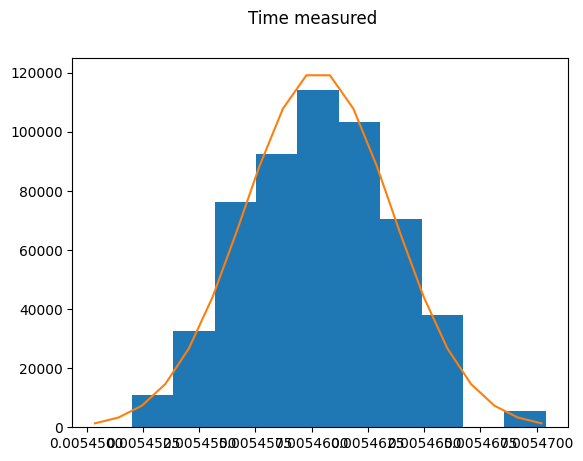

In [114]:
result = json.loads(canonicalExpr[indices[-50]].results)
result = np.asarray(result,dtype=np.float64)
print(result)

plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()
fig.suptitle("Time measured")
ax.hist(result, bins='auto', density=True)

mu = np.mean(result)
sigma = np.std(result)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, num=20)
y = (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * np.power((x - mu) / sigma, 2))
ax.plot(x, y)

plt.show()



### About Q-Q plot

1. 分位数是 CDF 的反函数
   - 回顾一下 `cdf(t) = P(x <= t)`
   - `percentile(m) = cdf^{-1}(m) = the 't' that P(x <= t) = m`
   - 则例如 50% 分位数，也就是 `percentile(0.5)`，就是有 50% 数据比他小的那个数据
2. 分位数图是实际数据的分位数关于理论数据的分位数的图
   - 分位数图上面的点 `(r, s)` 意味着在理论数据的分位数为 `r` 处对应的数据，在实际数据的分位数对应为 `s`
   - 也就是 `s = cdf_real(percentile_theoretical(r))`
3. 对于离散实际分布-连续理论分布的 pair 来说，`cdf_real` 可以理解成阶梯形式的，分位数可以认为在离散的点上有定义
   - 实际数据的分位数可以近似认为在 i/n 处有定义，为第 i 大的数据
   - 这样只要也知道理论分布在 i/n 处的值就行了，也就是 find k such that `P(x <= k) = i/n`
   - 这个操作是 cdf 函数的逆

SEE ALSO:
- https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf
- https://lbelzile.github.io/lineaRmodels/qqplot.html

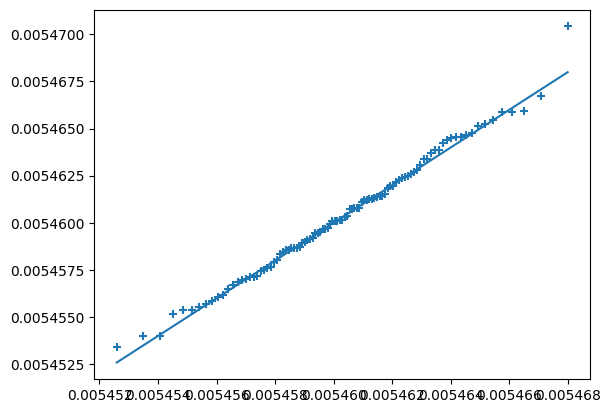

In [115]:
# TODO: implement me

result = np.sort(result)
y_vals = np.arange(len(result)) / float(len(result))
# print(y_vals)

theoretical_labels = scipy.stats.norm.ppf(y_vals, loc=mu, scale=sigma)

plt.rcParams['figure.dpi'] = 100
plt.scatter(theoretical_labels, result, marker='+')

# plot line
# TODO: ci bound
plt.plot(theoretical_labels, theoretical_labels)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

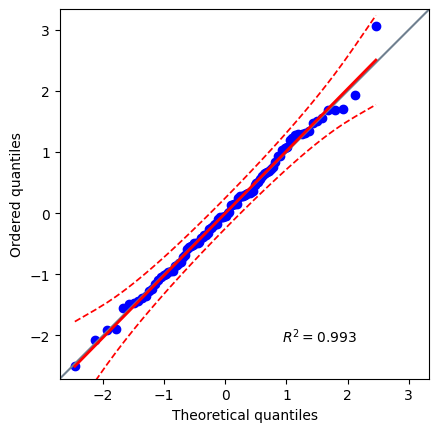

In [116]:

pingouin.qqplot(result)

从 Q-Q 图上，感觉量化误差对于小结果的影响还是比较大的，可以考虑增加 draw 的次数来进行 mitigate，不过每次 draw 自己的 overhead 就不能固定摊销了。

另一种办法是，删除这个。

目前先不继续考虑这个好了。

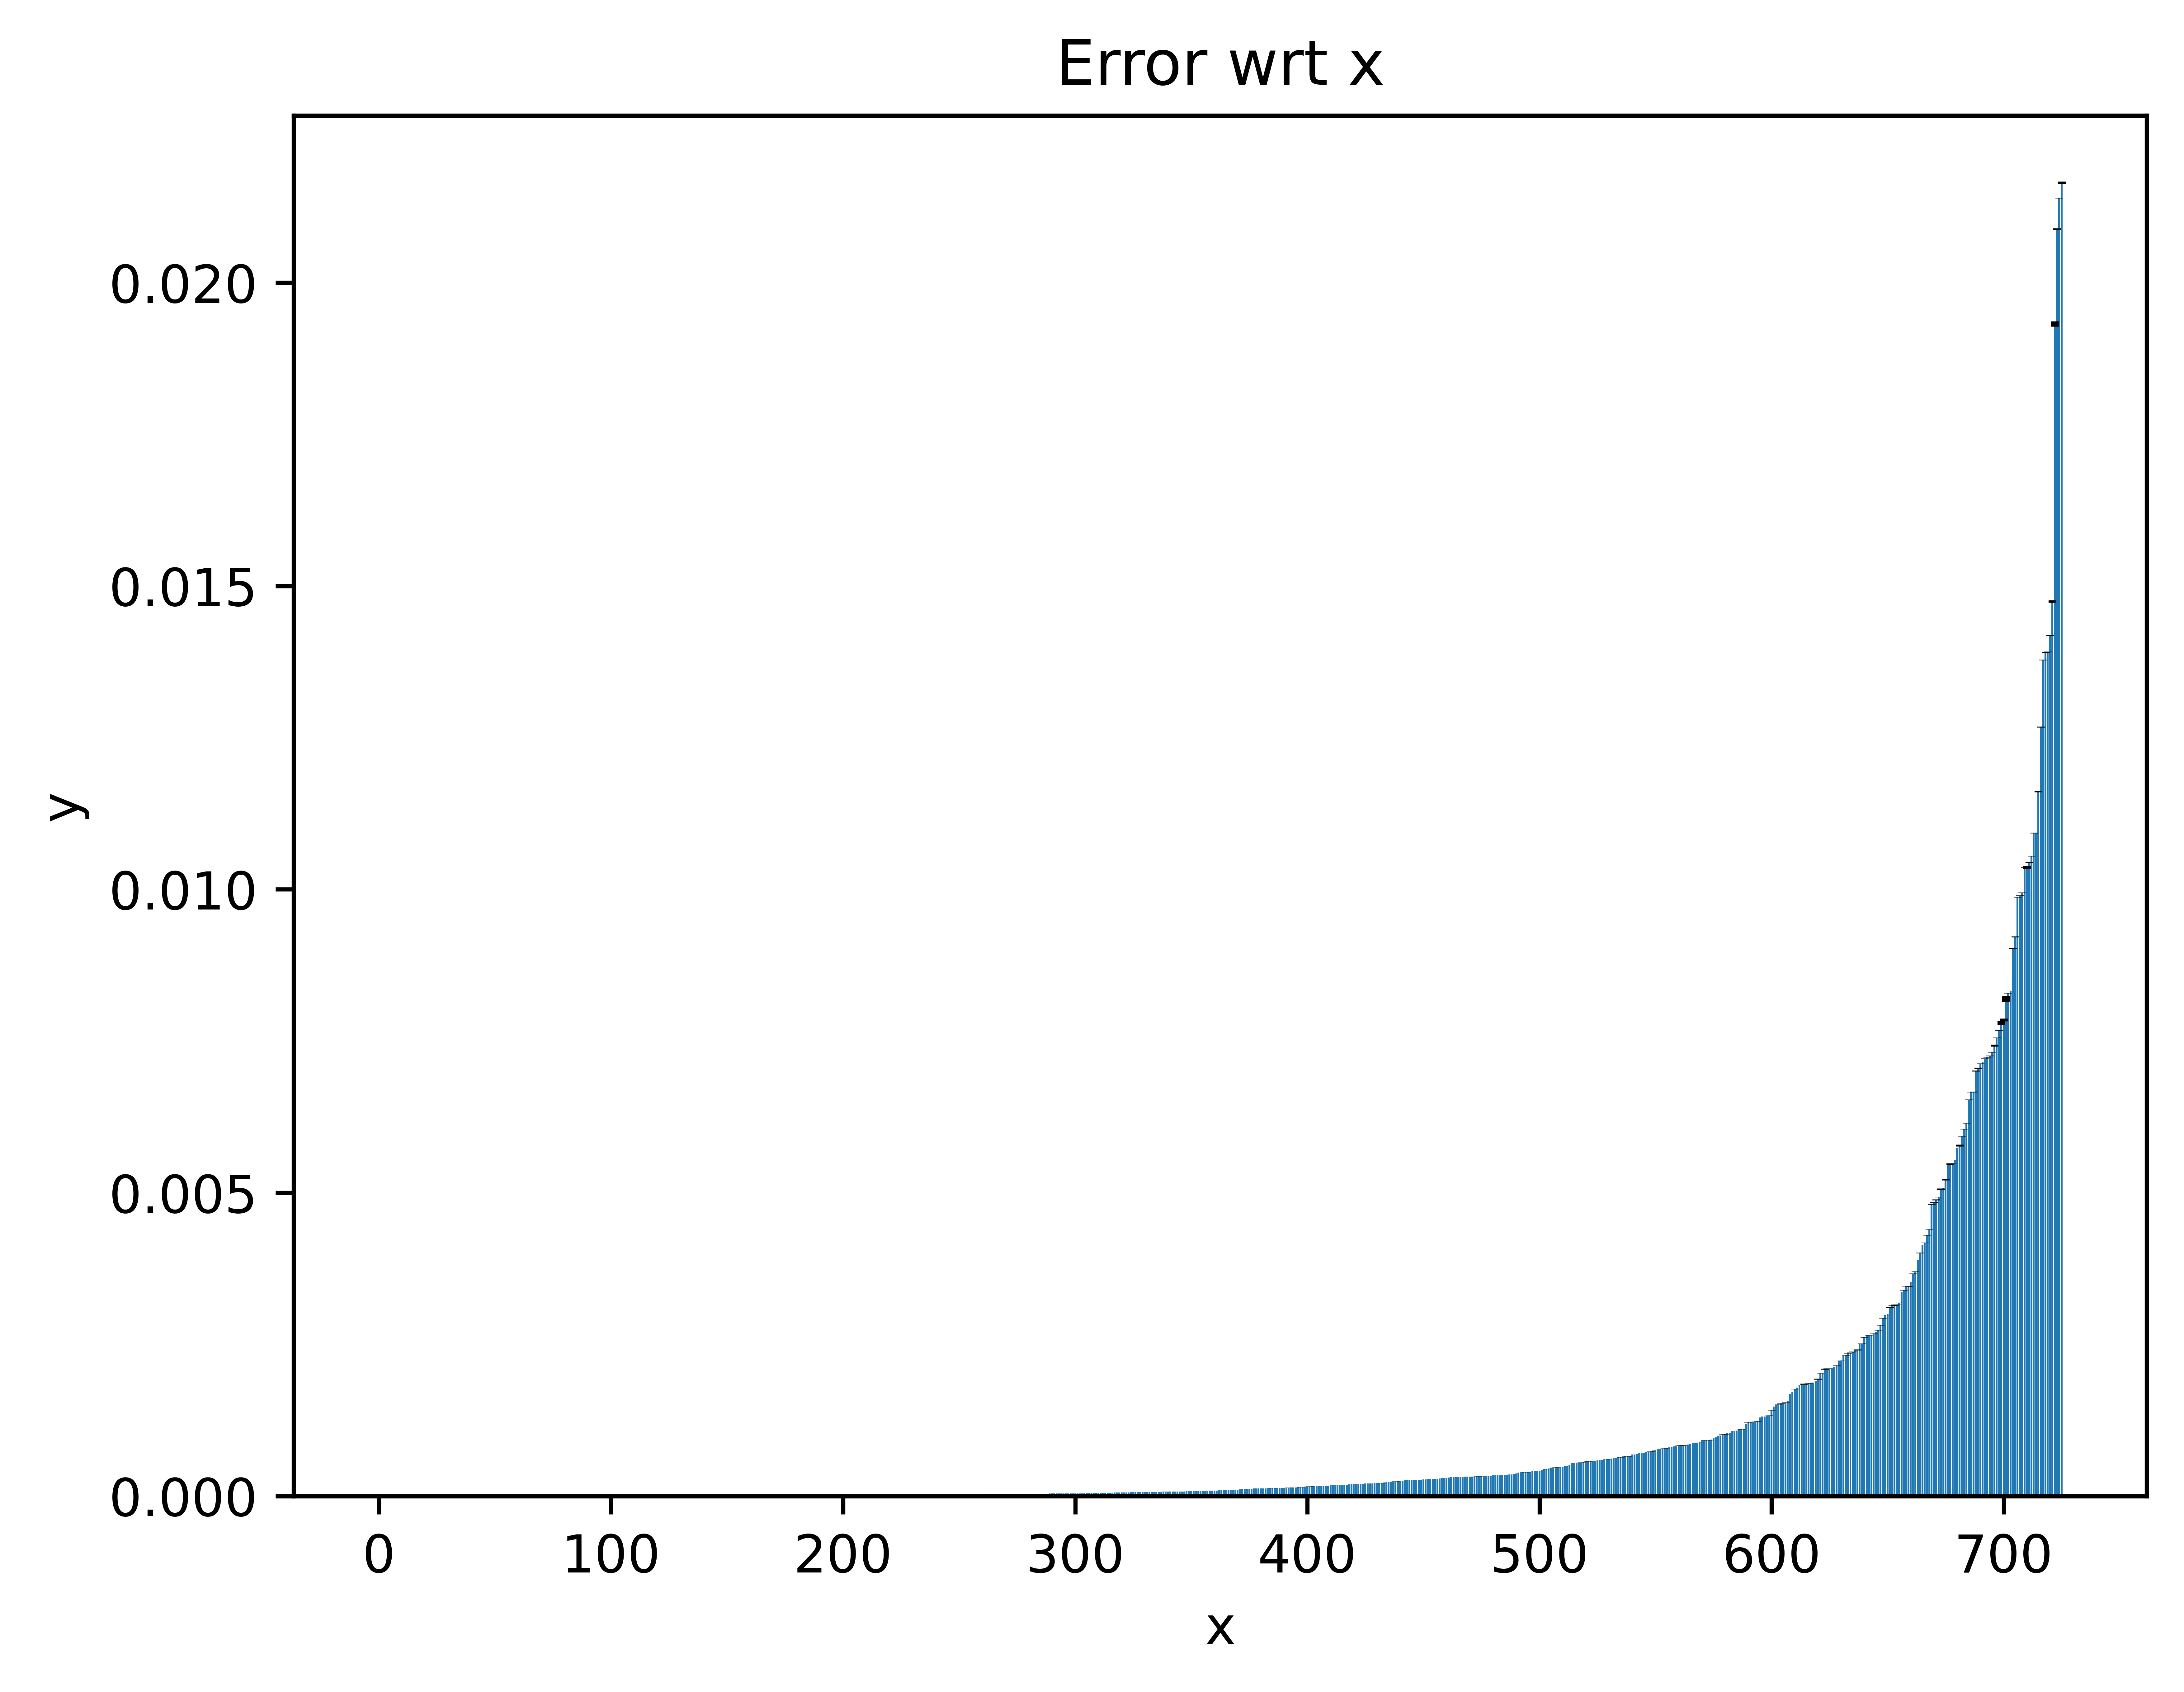

In [117]:
# Basic data
x = [i for i in range(0, len(exprMean))]
y = exprMean

# Assuming some error in y
yerr = exprStdev

# Actual plot
plt.rcParams['figure.dpi'] = 1200
plt.bar(x, y, yerr=yerr)

plt.title('Error wrt x')
plt.xlabel('x')
plt.ylabel('y')
# plt.yscale('log')

# plt.rcParams['figure.figsize'] = [100, 5]

# plt.show()

plt.savefig("test.png")


In [118]:
exprStdev

array([9.98911869e-09, 4.99980518e-09, 6.35870196e-09, 5.97440600e-09,
       7.80124035e-09, 1.39188686e-08, 7.25813049e-09, 1.01556849e-08,
       1.14742844e-08, 1.41534434e-08, 1.37445063e-08, 1.14596535e-08,
       2.10416428e-08, 1.55688416e-08, 1.25897875e-08, 1.41578878e-08,
       1.74007703e-08, 1.43125751e-08, 1.06397493e-08, 1.31119991e-08,
       1.34280724e-08, 1.93110219e-08, 1.20536588e-08, 1.38902118e-08,
       1.45451261e-08, 2.01277873e-08, 2.52195214e-08, 2.39221830e-08,
       1.02481887e-08, 1.02071794e-08, 1.40985129e-08, 1.94926140e-08,
       1.79197074e-08, 6.76460321e-09, 2.14590922e-08, 1.60882100e-08,
       4.30932488e-08, 1.90848987e-08, 2.80291827e-08, 1.11027291e-08,
       1.92294004e-08, 8.48376430e-09, 1.95098203e-08, 1.75889699e-08,
       2.01694210e-08, 1.74549203e-08, 2.65451139e-08, 2.60112125e-08,
       2.28964202e-08, 2.49015241e-08, 2.69652469e-08, 2.92914122e-08,
       4.00298876e-08, 2.54776468e-08, 2.34547418e-08, 2.72768691e-08,
      

In [119]:
exprMean

array([1.59868928e-05, 1.69783296e-05, 1.69791488e-05, 1.69793536e-05,
       1.69793536e-05, 1.69797632e-05, 1.69803776e-05, 1.69822208e-05,
       1.69842688e-05, 1.69844736e-05, 1.69852928e-05, 1.69854976e-05,
       1.69857024e-05, 1.69859072e-05, 1.69859072e-05, 1.69859072e-05,
       1.69863168e-05, 1.69873408e-05, 1.69879552e-05, 1.69879552e-05,
       1.69883648e-05, 1.69887744e-05, 1.69893888e-05, 1.69902080e-05,
       1.69914368e-05, 1.69924608e-05, 1.69996288e-05, 1.70258432e-05,
       1.70262528e-05, 1.70283008e-05, 1.70330112e-05, 1.70334208e-05,
       1.70369024e-05, 1.70399744e-05, 1.70416128e-05, 1.70440704e-05,
       1.70485760e-05, 1.70504192e-05, 1.70522624e-05, 1.70534912e-05,
       1.70541056e-05, 1.70553344e-05, 1.70649600e-05, 1.70663936e-05,
       1.70702848e-05, 1.70713088e-05, 1.70721280e-05, 1.70776576e-05,
       1.70801152e-05, 1.70811392e-05, 1.70819584e-05, 1.70827776e-05,
       1.70831872e-05, 1.70840064e-05, 1.70848256e-05, 1.70866688e-05,
      

In [120]:
1 / (exprStdev / exprMean)

array([ 1600.43075867,  3395.79823374,  2670.22246342,  2842.01535735,
        2176.49409997,  1219.90973166,  2339.49742548,  1672.18863154,
        1480.20287833,  1200.02413292,  1235.78777487,  1482.19992921,
         807.24221915,  1091.01933578,  1349.18141079,  1199.74867643,
         976.18188982,  1186.88220845,  1596.6499526 ,  1295.60374758,
        1265.13800839,   879.74496878,  1409.47981658,  1223.17846826,
        1168.18765704,   844.22895124,   674.0662737 ,   711.71779037,
        1661.39141809,  1668.26702344,  1208.14239746,   873.83974395,
         950.73552234,  2518.99096835,   794.14416398,  1059.41372212,
         395.62057763,   893.39846364,   608.37529902,  1535.97290998,
         886.87661729,  2010.34986402,   874.68565782,   970.28954352,
         846.34480925,   978.02272998,   643.13636264,   656.54984627,
         745.97317255,   685.94753958,   633.48051108,   583.20088863,
         426.76080874,   670.54883548,   728.41669927,   626.41605797,
      

Text(0, 0.5, 'y')

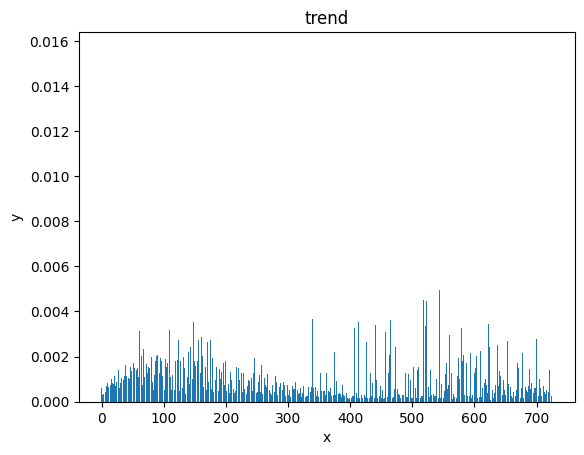

In [121]:
y = exprStdev / exprMean

plt.rcParams['figure.dpi'] = 100
plt.bar([i for i in range(0, len(y))], y)

plt.title('trend')
plt.xlabel('x')
plt.ylabel('y')

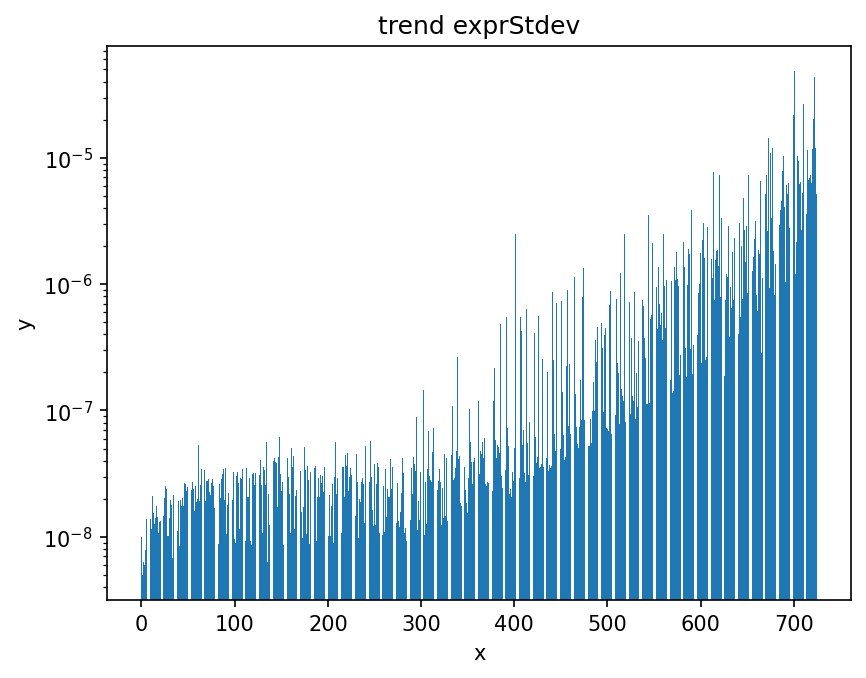

In [122]:
y = exprStdev

plt.rcParams['figure.dpi'] = 150
plt.bar([i for i in range(0, len(y))], y)

plt.title('trend exprStdev')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')

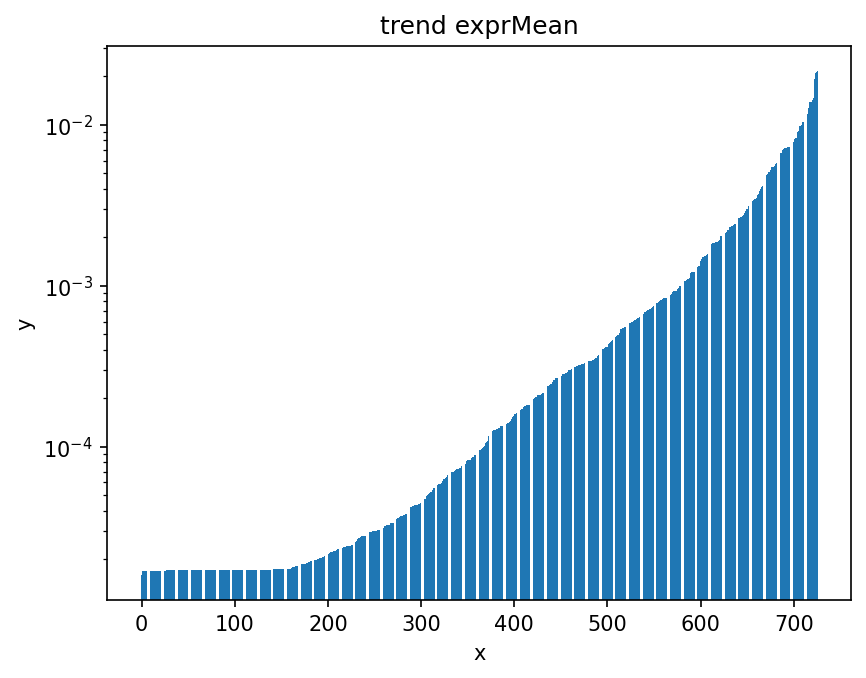

In [123]:
y = exprMean

plt.rcParams['figure.dpi'] = 150
plt.bar([i for i in range(0, len(y))], y)

plt.title('trend exprMean')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')